In [1]:
!pip install networkx
!pip install plotly

In [2]:
import geopandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import networkx as nx
import warnings
warnings.filterwarnings("ignore")

#**Part 1**
###City Chosen is **Cambridge**, Massachusetts, United States


In [3]:
data_link="http://data.insideairbnb.com/united-states/ma/cambridge/2023-12-26/visualisations/listings.csv"
data=pd.read_csv(data_link)
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,8521,Rental unit in Cambridge · ★4.80 · 2 bedrooms ...,306681,Janet,NaN,West Cambridge,42.382580,-71.136460,Entire home/apt,225.0,2,66,2023-08-26,0.38,2,284,16,C0121120491
1,11169,Home in Cambridge · ★4.78 · 1 bedroom · 1 priv...,40965,Judy,NaN,North Cambridge,42.396300,-71.131350,Private room,183.0,3,175,2023-10-23,1.05,3,346,11,NaN
2,19581,Bed and breakfast in Cambridge · ★4.50 · 1 bed...,74249,Marc And Patty,NaN,The Port,42.362580,-71.096030,Private room,225.0,10,11,2023-10-25,0.07,3,319,3,NaN
3,27498,Bed and breakfast in Cambridge · ★4.73 · 1 bed...,74249,Marc And Patty,NaN,The Port,42.362540,-71.096980,Private room,250.0,5,23,2023-10-29,0.14,3,359,4,NaN
4,79762,Rental unit in Cambridge · ★4.86 · 2 bedrooms ...,430015,Kevin,NaN,The Port,42.369500,-71.099210,Entire home/apt,300.0,3,408,2023-10-23,2.65,1,301,23,STR-15661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,1044098565668751581,Rental unit in Cambridge · ★New · 2 bedrooms ·...,107434423,Blueground,NaN,Area 2/MIT,42.362881,-71.087840,Entire home/apt,331.0,32,0,NaN,NaN,162,238,0,NaN
1126,1044546328683898929,Rental unit in Cambridge · ★New · 1 bedroom · ...,47563583,Ava,NaN,Mid-Cambridge,42.371040,-71.109180,Private room,104.0,2,0,NaN,NaN,2,26,0,NaN
1127,1047088601339599173,Rental unit in Cambridge · ★New · 2 bedrooms ·...,485446742,Shane,NaN,The Port,42.366091,-71.101423,Entire home/apt,182.0,29,0,NaN,NaN,9,179,0,C0305350491
1128,1047138754119174887,Rental unit in Cambridge · ★New · 1 bedroom · ...,50541668,Bassem,NaN,Area 2/MIT,42.358821,-71.095504,Entire home/apt,250.0,1,0,NaN,NaN,1,247,0,STR98474626


In [4]:
data.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               1130
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                               98
minimum_nights                       0
number_of_reviews                    0
last_review                        304
reviews_per_month                  304
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                            717
dtype: int64

In [5]:
data=data.drop(['neighbourhood_group','last_review','reviews_per_month','license'],axis=1)
data

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,8521,Rental unit in Cambridge · ★4.80 · 2 bedrooms ...,306681,Janet,West Cambridge,42.382580,-71.136460,Entire home/apt,225.0,2,66,2,284,16
1,11169,Home in Cambridge · ★4.78 · 1 bedroom · 1 priv...,40965,Judy,North Cambridge,42.396300,-71.131350,Private room,183.0,3,175,3,346,11
2,19581,Bed and breakfast in Cambridge · ★4.50 · 1 bed...,74249,Marc And Patty,The Port,42.362580,-71.096030,Private room,225.0,10,11,3,319,3
3,27498,Bed and breakfast in Cambridge · ★4.73 · 1 bed...,74249,Marc And Patty,The Port,42.362540,-71.096980,Private room,250.0,5,23,3,359,4
4,79762,Rental unit in Cambridge · ★4.86 · 2 bedrooms ...,430015,Kevin,The Port,42.369500,-71.099210,Entire home/apt,300.0,3,408,1,301,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,1044098565668751581,Rental unit in Cambridge · ★New · 2 bedrooms ·...,107434423,Blueground,Area 2/MIT,42.362881,-71.087840,Entire home/apt,331.0,32,0,162,238,0
1126,1044546328683898929,Rental unit in Cambridge · ★New · 1 bedroom · ...,47563583,Ava,Mid-Cambridge,42.371040,-71.109180,Private room,104.0,2,0,2,26,0
1127,1047088601339599173,Rental unit in Cambridge · ★New · 2 bedrooms ·...,485446742,Shane,The Port,42.366091,-71.101423,Entire home/apt,182.0,29,0,9,179,0
1128,1047138754119174887,Rental unit in Cambridge · ★New · 1 bedroom · ...,50541668,Bassem,Area 2/MIT,42.358821,-71.095504,Entire home/apt,250.0,1,0,1,247,0


In [6]:
data.nunique()

id                                1130
name                               684
host_id                            390
host_name                          331
neighbourhood                       13
latitude                           908
longitude                          939
room_type                            3
price                              325
minimum_nights                      37
number_of_reviews                  234
calculated_host_listings_count      22
availability_365                   288
number_of_reviews_ltm               89
dtype: int64

In [7]:
data=data.drop(['id'],axis=1)
data

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Rental unit in Cambridge · ★4.80 · 2 bedrooms ...,306681,Janet,West Cambridge,42.382580,-71.136460,Entire home/apt,225.0,2,66,2,284,16
1,Home in Cambridge · ★4.78 · 1 bedroom · 1 priv...,40965,Judy,North Cambridge,42.396300,-71.131350,Private room,183.0,3,175,3,346,11
2,Bed and breakfast in Cambridge · ★4.50 · 1 bed...,74249,Marc And Patty,The Port,42.362580,-71.096030,Private room,225.0,10,11,3,319,3
3,Bed and breakfast in Cambridge · ★4.73 · 1 bed...,74249,Marc And Patty,The Port,42.362540,-71.096980,Private room,250.0,5,23,3,359,4
4,Rental unit in Cambridge · ★4.86 · 2 bedrooms ...,430015,Kevin,The Port,42.369500,-71.099210,Entire home/apt,300.0,3,408,1,301,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,Rental unit in Cambridge · ★New · 2 bedrooms ·...,107434423,Blueground,Area 2/MIT,42.362881,-71.087840,Entire home/apt,331.0,32,0,162,238,0
1126,Rental unit in Cambridge · ★New · 1 bedroom · ...,47563583,Ava,Mid-Cambridge,42.371040,-71.109180,Private room,104.0,2,0,2,26,0
1127,Rental unit in Cambridge · ★New · 2 bedrooms ·...,485446742,Shane,The Port,42.366091,-71.101423,Entire home/apt,182.0,29,0,9,179,0
1128,Rental unit in Cambridge · ★New · 1 bedroom · ...,50541668,Bassem,Area 2/MIT,42.358821,-71.095504,Entire home/apt,250.0,1,0,1,247,0


In [8]:
geojson_path="http://data.insideairbnb.com/united-states/ma/cambridge/2023-12-26/visualisations/neighbourhoods.geojson"
data_geo=geopandas.read_file(geojson_path)
data_geo.head()

,neighbourhood,neighbourhood_group,geometry
0,The Port,None,"MULTIPOLYGON (((-71.09853 42.37183, -71.09846 ..."
1,Riverside,None,"MULTIPOLYGON (((-71.10399 42.36557, -71.10432 ..."
2,Area 2/MIT,None,"MULTIPOLYGON (((-71.08973 42.36490, -71.08941 ..."
3,Cambridgeport,None,"MULTIPOLYGON (((-71.10371 42.36540, -71.10362 ..."
4,Mid-Cambridge,None,"MULTIPOLYGON (((-71.10728 42.37809, -71.10416 ..."


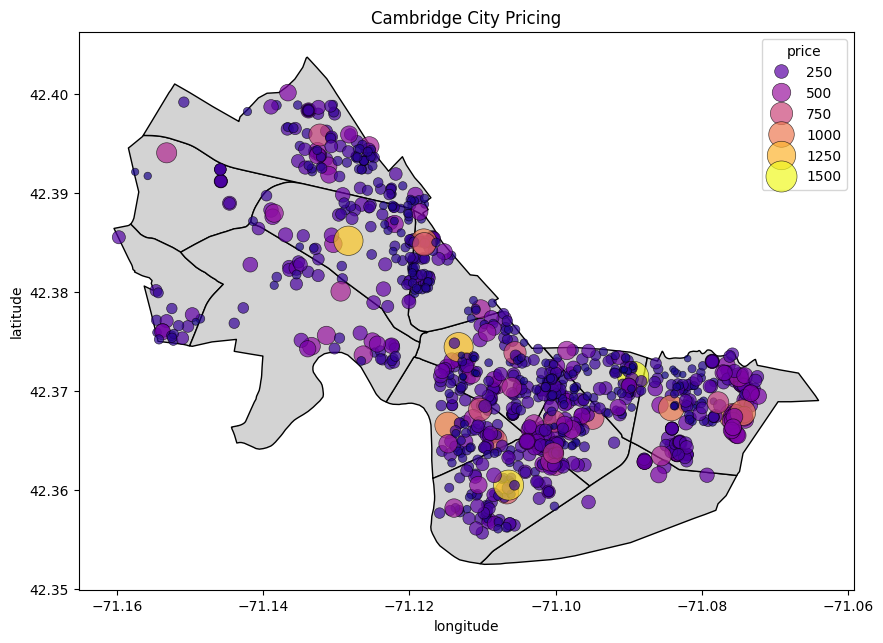

In [9]:
data_geo.plot(color='lightgray', edgecolor='black', figsize=(10, 8))
plot=sns.scatterplot(data=data, x="longitude", y="latitude", size="price", hue="price",sizes=(20, 500), alpha=0.7, palette='plasma', edgecolor='black')
plot.set_title("Cambridge City Pricing")
plt.show()

# **Part 2**

In [10]:
df=pd.read_csv("manan.csv")
df = df.rename(columns={'Unnamed: 0': 'city'})
df

,city,latitude,longitude
0,Chang'an,34.260771,108.942344
1,Baoji,34.364581,107.233218
2,Pingliang,35.226780,106.495648
3,Longxi,35.007895,104.639017
4,Lanzhou,36.062078,103.831857
5,Xining,36.617331,101.776198
6,Wuwei,37.928881,102.635989
7,Zhangye,39.121833,99.924947
8,Jiayuguan,39.772229,98.288539
9,Dunhuang,40.141100,94.660759


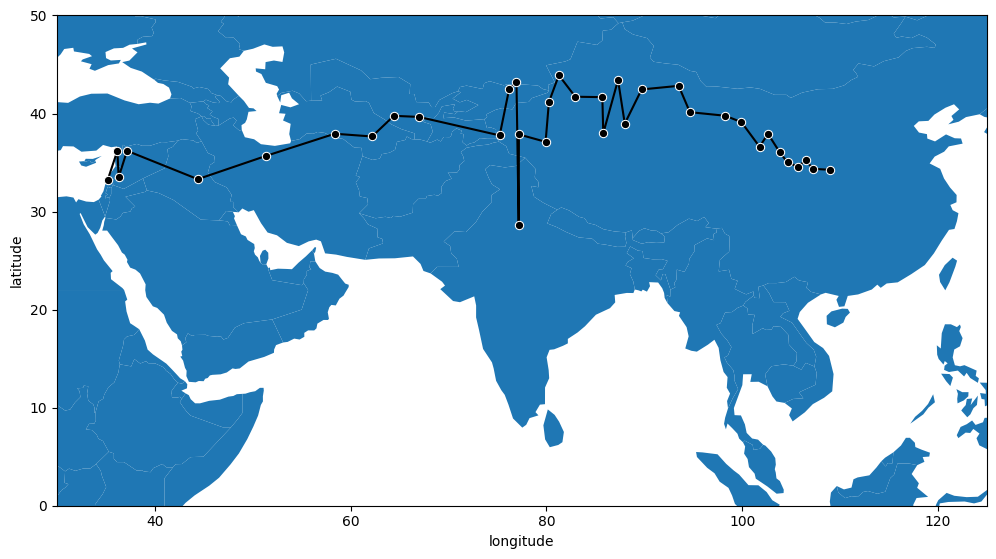

In [14]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot(figsize=(12, 12))
plot=sns.lineplot(data=df, x="longitude", y="latitude",color='black',marker='o')
plot.set_xlim(30,125)
plot.set_ylim(0,50)
plt.show()

In [15]:
data_pd=pd.read_csv("Connections.csv")
data_pd

,Unnamed: 0,Chang'an,Baoji,Pingliang,Longxi,Lanzhou,Xining,Wuwei,Zhangye,Jiayuguan,...,Tyre,Aleppo,Antioch,Baghdad,Tehran,Ashgabat,Merv,Bukhara,Samarkand,Delhi
0,Chang'an,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Baoji,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Pingliang,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Longxi,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Lanzhou,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Xining,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,Wuwei,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,Zhangye,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8,Jiayuguan,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,Dunhuang,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:
graph_nx = nx.Graph()

for i, row in df.iterrows():
    graph_nx.add_node(row['city'], pos=(row['longitude'], row['latitude']))

for i in range(36):
    for j in range(1,37):
        if data_pd.iloc[i, j] == 1 and not graph_nx.has_edge(data_pd.iloc[i, 0], data_pd.iloc[j-1, 0]):
            graph_nx.add_edge(data_pd.iloc[i, 0], data_pd.iloc[j-1, 0])


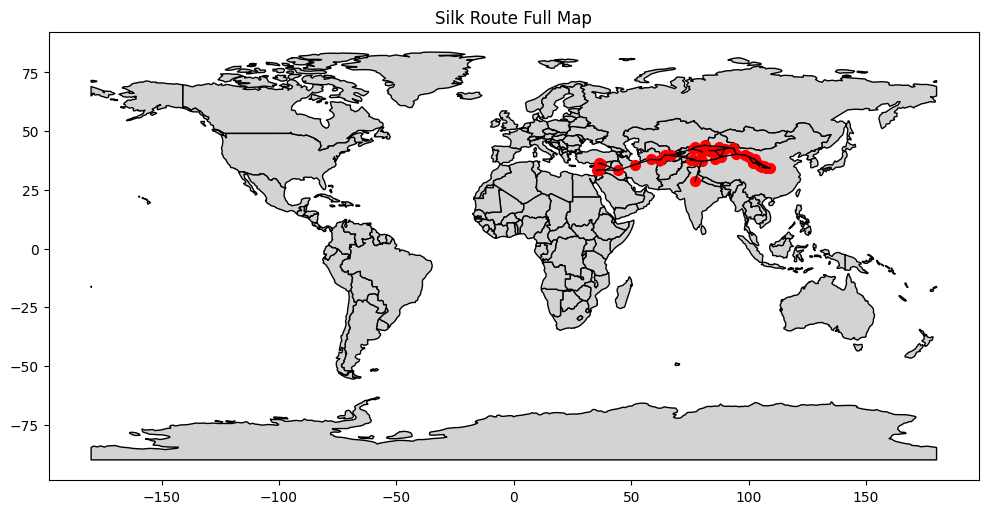

In [17]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities_gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))
worlds=world.plot(figsize=(12, 12), color='lightgray',edgecolor='black')
plot = cities_gdf.plot(ax=plt.gca(), marker='o', color='red', markersize=50, label='Cities')

for edge in graph_nx.edges():
    # Extract the x, y coordinates of the nodes in the edge
    node_positions = []
    for node in edge:
        pos = graph_nx.nodes[node]['pos']
        node_positions.append(pos)

    # Plot the edge
    x=[]
    y=[]
    for i in node_positions:
      x.append(i[0])
      y.append(i[1])

    plt.plot(x, y, 'k-', linewidth=1)

# Setting Title
plot.set_title("Silk Route Full Map")
plt.show()

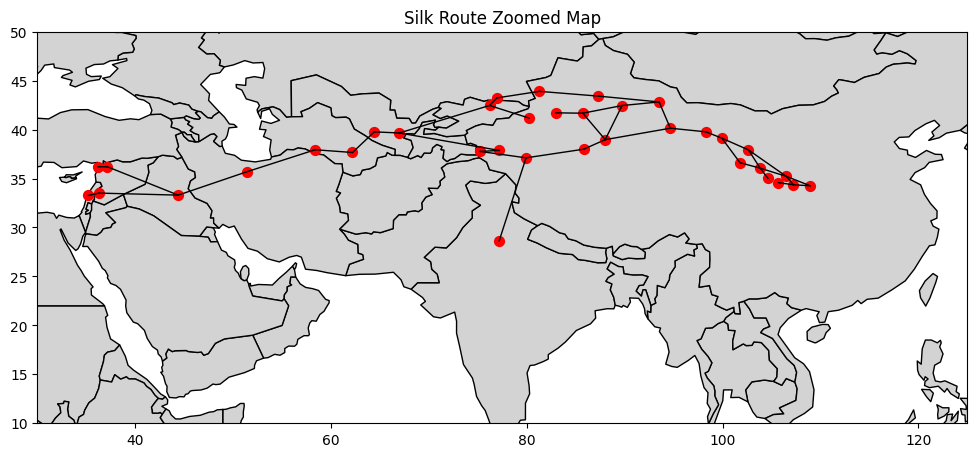

In [18]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities_gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))
worlds=world.plot(figsize=(12, 12), color='lightgray',edgecolor='black')
plot = cities_gdf.plot(ax=plt.gca(), marker='o', color='red', markersize=50, label='Cities')

for edge in graph_nx.edges():
    # Extract the x, y coordinates of the nodes in the edge
    node_positions = []
    for node in edge:
        pos = graph_nx.nodes[node]['pos']
        node_positions.append(pos)

    # Plot the edge
    x=[]
    y=[]
    for i in node_positions:
      x.append(i[0])
      y.append(i[1])

    plt.plot(x, y, 'k-', linewidth=1)

# Setting X_label and Y_Label and Title
plot.set_xlim(30, 125)
plot.set_ylim(10, 50)
plot.set_title("Silk Route Zoomed Map")
plt.show()